In [302]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [303]:
train_df = pd.read_csv('data/train.csv', sep=';', decimal=',')
test_df = pd.read_csv('data/test.csv', sep=';', decimal=',')

In [304]:
train_df.head()

,waktu_setempat,id_jalan,id_titik_mulai,id_titik_akhir,rerata_kecepatan,max_speed_kph,lanes,lanes_forward,lanes_backward,busway,highway,concat_mulai_akhir,distance
0,2020-02-01 01:00:00+00:00,691007296,21390008,1425033102,29.126,48.28032,3,2,1,0,trunk,2.139000e+17,7.914363
1,2020-02-01 01:00:00+00:00,47010584,1677092762,579493410,46.576,48.28032,4,1,1,2,primary,1.677090e+18,19.984653
2,2020-02-01 01:00:00+00:00,22932408,26486694,1930267566,36.587,32.18688,2,1,1,0,secondary,2.648670e+17,44.684593
3,2020-02-01 01:00:00+00:00,142479648,1111592522,3775231113,34.063,32.18688,3,1,1,1,primary,1.111590e+19,82.340453
4,2020-02-01 01:00:00+00:00,8504977,5940503398,5940503394,38.336,48.28032,2,1,1,0,primary,5.940500e+19,29.117877


In [305]:
import pandas as pd

train_df = pd.get_dummies(train_df, columns=['id_jalan'], prefix='id_jalan')
test_df = pd.get_dummies(test_df, columns=['id_jalan'], prefix='id_jalan')

In [306]:
train_df.head()

,waktu_setempat,id_titik_mulai,id_titik_akhir,rerata_kecepatan,max_speed_kph,lanes,lanes_forward,lanes_backward,busway,highway,...,id_jalan_26785612,id_jalan_40044423,id_jalan_47010584,id_jalan_50841260,id_jalan_66924592,id_jalan_97453767,id_jalan_142479648,id_jalan_150783571,id_jalan_182210371,id_jalan_691007296
0,2020-02-01 01:00:00+00:00,21390008,1425033102,29.126,48.28032,3,2,1,0,trunk,...,False,False,False,False,False,False,False,False,False,True
1,2020-02-01 01:00:00+00:00,1677092762,579493410,46.576,48.28032,4,1,1,2,primary,...,False,False,True,False,False,False,False,False,False,False
2,2020-02-01 01:00:00+00:00,26486694,1930267566,36.587,32.18688,2,1,1,0,secondary,...,False,False,False,False,False,False,False,False,False,False
3,2020-02-01 01:00:00+00:00,1111592522,3775231113,34.063,32.18688,3,1,1,1,primary,...,False,False,False,False,False,False,True,False,False,False
4,2020-02-01 01:00:00+00:00,5940503398,5940503394,38.336,48.28032,2,1,1,0,primary,...,False,False,False,False,False,False,False,False,False,False


In [307]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127489 entries, 0 to 127488
Data columns (total 32 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  127489 non-null  int64  
 1   waktu_setempat      127489 non-null  object 
 2   id_titik_mulai      127489 non-null  int64  
 3   id_titik_akhir      127489 non-null  int64  
 4   max_speed_kph       127489 non-null  float64
 5   lanes               127489 non-null  int64  
 6   lanes_forward       127489 non-null  int64  
 7   lanes_backward      127489 non-null  int64  
 8   busway              127489 non-null  int64  
 9   highway             127489 non-null  object 
 10  concat_mulai_akhir  127489 non-null  object 
 11  distance            127489 non-null  float64
 12  id_jalan_1210       127489 non-null  bool   
 13  id_jalan_3688059    127489 non-null  bool   
 14  id_jalan_3691841    127489 non-null  bool   
 15  id_jalan_4004732    127489 non-nul

In [308]:
train_df['waktu_setempat'] = pd.to_datetime(train_df['waktu_setempat'])
test_df['waktu_setempat'] = pd.to_datetime(test_df['waktu_setempat'])

In [309]:
train_df['hour'] = train_df['waktu_setempat'].dt.hour
train_df['day_of_week'] = train_df['waktu_setempat'].dt.dayofweek
train_df['month'] = train_df['waktu_setempat'].dt.month
train_df['week'] = train_df['waktu_setempat'].dt.isocalendar().week

train_df['week'] = train_df['week'].astype(int)


In [310]:
test_df['hour'] = test_df['waktu_setempat'].dt.hour
test_df['day_of_week'] = test_df['waktu_setempat'].dt.dayofweek
test_df['month'] = test_df['waktu_setempat'].dt.month
test_df['week'] = test_df['waktu_setempat'].dt.isocalendar().week

test_df['week'] = test_df['week'].astype(int)

In [311]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398648 entries, 0 to 398647
Data columns (total 36 columns):
 #   Column              Non-Null Count   Dtype              
---  ------              --------------   -----              
 0   waktu_setempat      398648 non-null  datetime64[ns, UTC]
 1   id_titik_mulai      398648 non-null  int64              
 2   id_titik_akhir      398648 non-null  int64              
 3   rerata_kecepatan    398648 non-null  float64            
 4   max_speed_kph       398648 non-null  float64            
 5   lanes               398648 non-null  int64              
 6   lanes_forward       398648 non-null  int64              
 7   lanes_backward      398648 non-null  int64              
 8   busway              398648 non-null  int64              
 9   highway             398648 non-null  object             
 10  concat_mulai_akhir  398648 non-null  float64            
 11  distance            398648 non-null  float64            
 12  id_jalan_1210   

In [312]:
train_df.drop(columns=['highway', 'waktu_setempat', 'id_titik_mulai', 'id_titik_akhir', 'month', 'concat_mulai_akhir'], inplace=True)
test_df.drop(columns=['highway', 'waktu_setempat', 'id_titik_mulai', 'id_titik_akhir', 'month', 'concat_mulai_akhir'], inplace=True)

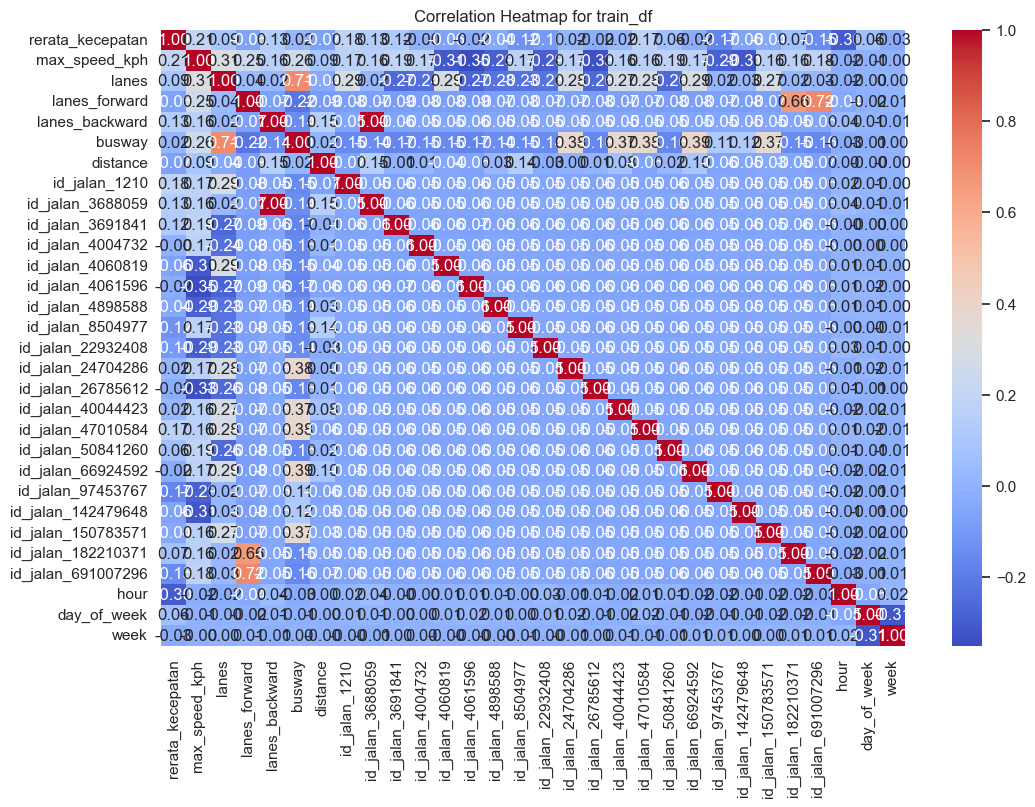

In [313]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already loaded the DataFrame as 'train_df'
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
sns.heatmap(train_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap for train_df")
plt.show()

In [314]:
# Remove outliers from 'rerata_kecepatan' column
Q1 = train_df['rerata_kecepatan'].quantile(0.25)
Q3 = train_df['rerata_kecepatan'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

train_df = train_df[(train_df['rerata_kecepatan'] >= lower_bound) & (train_df['rerata_kecepatan'] <= upper_bound)]


In [315]:
## Train - Test Split
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Function to calculate sMAPE
def smape(actual, forecast):
    return 100 * np.mean(2 * np.abs(forecast - actual) / (np.abs(actual) + np.abs(forecast)))

X = train_df.drop(columns=['rerata_kecepatan'])
# X = train_df.drop(columns=['rerata_kecepatan', 'busway', 'lanes', 'lanes_forward', 'lanes_backward'])
# X = train_df.drop(columns=['rerata_kecepatan', 'busway', 'lanes_forward', 'lanes_backward'])

y = train_df['rerata_kecepatan']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [316]:
# Linear Regression
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)
y_pred_linear_reg = linear_reg_model.predict(X_test)
smape_linear_reg = smape(y_test, y_pred_linear_reg)
print("Linear Regression sMAPE:", smape_linear_reg)

Linear Regression sMAPE: 13.147132448074503


In [317]:
from xgboost import XGBRegressor

# XGBRegressor
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
smape_xgb = smape(y_test, y_pred_xgb)
print("XGBoost sMAPE:", smape_xgb)

XGBoost sMAPE: 8.544990983729289


In [318]:
id_series = test_df['id']
id_df = pd.DataFrame({'id': id_series})

In [319]:
test_df.drop(columns=['id'], inplace=True)
# test_df.drop(columns=['id', 'busway', 'lanes', 'lanes_forward', 'lanes_backward'], inplace=True)
# test_df.drop(columns=['id', 'busway', 'lanes_forward', 'lanes_backward'], inplace=True)

In [320]:
# KNeighborsRegressor
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

# Create and train the KNeighborsRegressor model
knn_model = KNeighborsRegressor(n_neighbors=5, weights='uniform')  # You can change the hyperparameters here
knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn = knn_model.predict(X_test)

# Calculate sMAPE
smape_knn = smape(y_test, y_pred_knn)

# Print the sMAPE score
print("KNeighborsRegressor sMAPE:", smape_knn)

KNeighborsRegressor sMAPE: 9.18621246681686


In [321]:
# # RandomForestRegressor
# import numpy as np
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import train_test_split

# # Create and train the RandomForestRegressor model
# rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # You can change the hyperparameters here
# rf_model.fit(X_train, y_train)

# # Make predictions on the test set
# y_pred_rf = rf_model.predict(X_test)

# # Calculate sMAPE
# smape_rf = smape(y_test, y_pred_rf)

# # Print the sMAPE score
# print("RandomForestRegressor sMAPE:", smape_rf)

In [322]:
# # Optuna
# import optuna
# import xgboost as xgb
# from sklearn.metrics import mean_squared_error

# # Define the objective function for Optuna
# def objective(trial):
#     # Define the hyperparameters to be optimized
#     params = {
#         'n_estimators': trial.suggest_int('n_estimators', 50, 1000),
#         'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 1.0),
#         'max_depth': trial.suggest_int('max_depth', 3, 10),
#         'subsample': trial.suggest_float('subsample', 0.1, 1.0),
#         'colsample_bytree': trial.suggest_float('colsample_bytree', 0.1, 1.0),
#     }

#     # Create the XGBoost model with the suggested hyperparameters
#     model = xgb.XGBRegressor(**params)

#     # Train the model
#     model.fit(X_train, y_train)

#     # Make predictions on the test set
#     y_pred = model.predict(X_test)

#     # Calculate the sMAPE
#     smape_score = smape(y_test, y_pred)

#     return smape_score

# # Create an Optuna study object
# study = optuna.create_study(direction='minimize')

# # Start the optimization process
# study.optimize(objective, n_trials=30)

# # Get the best hyperparameters found by Optuna
# best_params = study.best_params

# # Create the XGBoost model with the best hyperparameters
# xgb_model = xgb.XGBRegressor(**best_params)

# # Train the model on the full training data
# xgb_model.fit(X_train, y_train)

# # Make predictions on the test set
# y_pred_xgb = xgb_model.predict(X_test)

# # Calculate sMAPE
# smape_xgb = smape(y_test, y_pred_xgb)

# # Print the results
# print("Best Hyperparameters:", best_params)
# print("XGBoost sMAPE:", smape_xgb)

In [323]:
y_results = xgb_model.predict(test_df)
y_results_df = pd.DataFrame({'rerata_kecepatan': y_results})

# Concatenate id_df and y_results_df horizontally
result_df = pd.concat([id_df, y_results_df], axis=1)
print(result_df)

# Store the concatenated DataFrame to a CSV file
result_df.to_csv('Data/submission.csv', index=False)

print("Data saved to 'data/submission.csv'")

            id  rerata_kecepatan
0            0         41.621498
1            1         38.298111
2            2         37.195843
3            3         38.922523
4            4         30.021225
...        ...               ...
127484  127484         30.745152
127485  127485         31.504971
127486  127486         42.300991
127487  127487         34.001804
127488  127488         40.468502

[127489 rows x 2 columns]
Data saved to 'data/submission.csv'
